In [1]:
import numpy as np

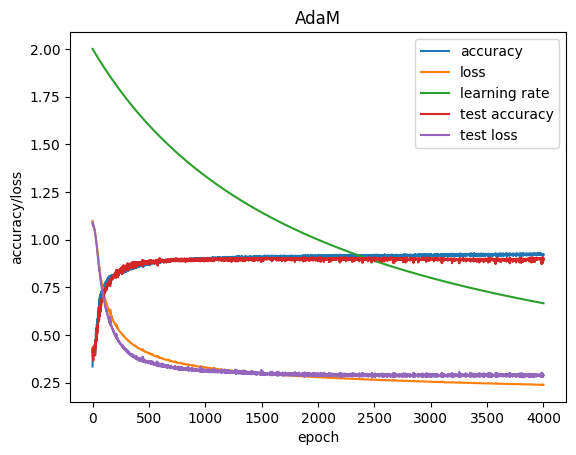

In [21]:
import numpy as np
from lib.datasets import spiral_data
from lib.dense_layer import Layer_Dense
from lib.activations import Activation_ReLU
from lib.combo import Activation_Softmax_Loss_CategoricalCrossentropy
from lib.optimizers import Optimizer_RMSProp, Optimizer_SGD, Optimizer_Adam
# import json

#  Load dataset
# with open('./spiral.json') as f:
#     sp = json.load(f)
# X = np.array(sp['X'])
# y = np.array(sp['y'])

X, y = spiral_data(200, 3)
X_test, y_test = spiral_data(100, 3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output # of previous layer here) and 3 output values
dense2 = Layer_Dense(512, 3)
# Create Softmax+ Categorical cross-entropy
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
# optimizer = Optimizer_RMSProp(decay=1e-5, learning_rate=0.005, rho=0.999)
# optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)
optimizer = Optimizer_Adam(learning_rate=0.02, decay=5e-4)

output = []


if len(y.shape) == 2:
  y = np.argmax(y, axis=1)
if len(y_test.shape) == 2:
  y_test = np.argmax(y_test, axis=1)


for epoch in range(4001):
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  data_loss = loss_activation.forward(dense2.output, y)
  regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
  loss = data_loss + regularization_loss
  predictions = np.argmax(loss_activation.output, axis=1)
  # == between two np.arrays makes a new array of booleans (true if equal, false if not)
  # np.mean() of the boolean array is a fraction of correct predictions i.e. accuracy
  accuracy = np.mean(predictions == y)
  out = [epoch, accuracy, loss, optimizer.get_lr(epoch)]

  loss_activation.backward(loss_activation.output, y)
  dense2.backward(loss_activation.d_inputs)
  activation1.backward(dense2.d_inputs)
  dense1.backward(activation1.d_inputs)

  optimizer.update_params(dense1, epoch)
  optimizer.update_params(dense2, epoch)


  # forward pass on test data
  dense1.forward(X_test)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  loss_test = loss_activation.forward(dense2.output, y_test)
  predictions = np.argmax(loss_activation.output, axis=1)
  accuracy_test = np.mean(predictions == y_test)
  out.append(accuracy_test)
  out.append(loss_test)

  # if not epoch % 100:
  if data_loss < 1.5:
    output.append(out)
  
# display output as a plot, showing accuracy and loss as a function of epoch as blue and orange lines, respectively
import matplotlib.pyplot as plt
plt.title('AdaM')
# plt.title('SGD with momentum')
# plt.title('RMSProp')
plt.plot(np.array(output)[:,0], np.array(output)[:,1])
plt.plot(np.array(output)[:,0], np.array(output)[:,2])
plt.plot(np.array(output)[:,0], np.array(output)[:,3] * 100)
plt.plot(np.array(output)[:,0], np.array(output)[:,4])
plt.plot(np.array(output)[:,0], np.array(output)[:,5])
plt.legend(['accuracy', 'loss', 'learning rate', 'test accuracy', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()



In [3]:
# read ./deno-out.json
import json
# create `./deno-out.json` with `deno run mod.ts > ../nn-from-scratch-py/deno-out.json` 
# in `nn-from-scratch-deno`
with open('./deno-out.json') as f:
    out = json.load(f)

plt.title('NNFS, Deno')
plt.plot(np.array(out)[:,0], np.array(out)[:,1])
plt.plot(np.array(out)[:,0], np.array(out)[:,2])
plt.legend(['accuracy', 'loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './deno-out.json'

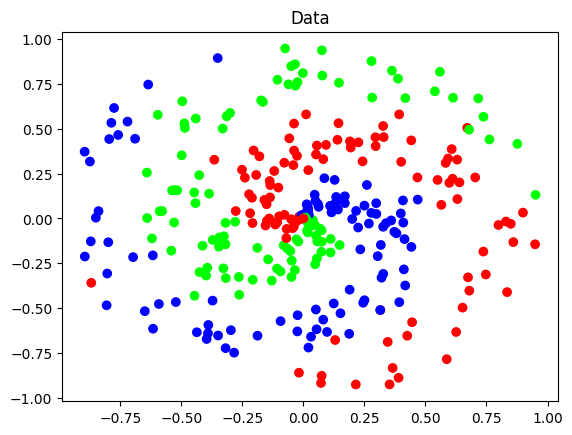

In [ ]:
with open('./spiral.json') as f:
    sp = json.load(f)
X = np.array(sp['X'])
y = np.array(sp['y'])

plt.title('Data')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

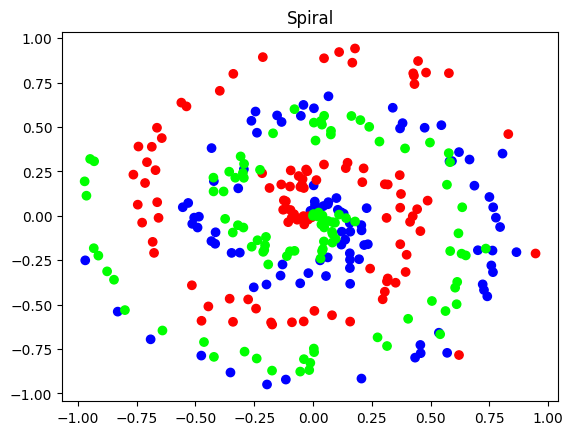

In [ ]:
plt.title('Spiral')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()